Мультивариативный ряд: история цен и объём торгов курса эфириума к доллару США.<br>
Каждая информация об конкретной криптовалюты представлена на уровне минуты.<br>
Данные охватывают период за c января 2020 года по март 2021 года.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'data/gemini_ETHUSD_2020_1min.csv'
data = pd.read_csv(file_path, index_col=False).sort_values(by=['Unix Timestamp'])
data.reset_index(drop=True, inplace=True)
data['Unix Timestamp'] = pd.to_datetime(data['Unix Timestamp'], unit='ms')

In [25]:
data

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,2020-01-01 00:53:20,1/1/2020 0:00,ETHUSD,128.84,128.84,128.74,128.74,0.010000
1,2020-01-01 00:53:20,1/1/2020 1:41,ETHUSD,130.01,130.01,129.96,130.00,3.769996
2,2020-01-01 00:53:20,1/1/2020 1:40,ETHUSD,130.01,130.01,130.01,130.01,0.000000
3,2020-01-01 00:53:20,1/1/2020 1:39,ETHUSD,130.01,130.01,130.01,130.01,0.000000
4,2020-01-01 00:53:20,1/1/2020 1:38,ETHUSD,130.01,130.01,130.01,130.01,0.000000
...,...,...,...,...,...,...,...,...
658054,2021-04-20 00:53:20,4/19/2021 23:42,ETHUSD,2161.00,2165.00,2161.00,2164.75,10.160276
658055,2021-04-20 00:53:20,4/19/2021 23:43,ETHUSD,2164.75,2169.00,2164.30,2167.77,1.535139
658056,2021-04-20 00:53:20,4/19/2021 23:44,ETHUSD,2167.77,2167.77,2162.28,2163.55,7.080331
658057,2021-04-20 00:53:20,4/19/2021 23:38,ETHUSD,2171.22,2171.67,2166.86,2167.02,2.572669


Разделение на обучающую и валидационную выборки

In [26]:
half_size = len(data) // 2
first_half = data.iloc[:half_size]
second_half = data.iloc[half_size:]

data = first_half
validation = second_half

Просмотр основной информации о мультивариационном ряде

In [27]:
data

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,2020-01-01 00:53:20,1/1/2020 0:00,ETHUSD,128.84,128.84,128.74,128.74,0.010000
1,2020-01-01 00:53:20,1/1/2020 1:41,ETHUSD,130.01,130.01,129.96,130.00,3.769996
2,2020-01-01 00:53:20,1/1/2020 1:40,ETHUSD,130.01,130.01,130.01,130.01,0.000000
3,2020-01-01 00:53:20,1/1/2020 1:39,ETHUSD,130.01,130.01,130.01,130.01,0.000000
4,2020-01-01 00:53:20,1/1/2020 1:38,ETHUSD,130.01,130.01,130.01,130.01,0.000000
...,...,...,...,...,...,...,...,...
329024,2020-08-30 12:20:00,8/30/2020 11:09,ETHUSD,404.15,404.15,404.15,404.15,0.000000
329025,2020-08-30 12:20:00,8/30/2020 11:11,ETHUSD,404.13,404.27,404.13,404.27,0.291400
329026,2020-08-30 12:20:00,8/30/2020 11:12,ETHUSD,404.27,404.60,404.27,404.60,0.675909
329027,2020-08-30 12:20:00,8/30/2020 11:14,ETHUSD,404.60,404.60,404.49,404.49,0.024990


In [28]:
data.describe()

,Unix Timestamp,Open,High,Low,Close,Volume
count,329029,329029.000000,329029.000000,329029.000000,329029.000000,329029.000000
mean,2020-05-01 03:11:14.657857280,227.141349,227.225892,227.055773,227.142183,15.167789
min,2020-01-01 00:53:20,88.880000,89.700000,86.620000,88.880000,0.000000
25%,2020-03-02 03:33:20,170.900000,170.960000,170.840000,170.900000,0.000000
50%,2020-05-01 05:13:20,220.850000,220.940000,220.750000,220.850000,0.004000
75%,2020-06-30 09:40:00,243.610000,243.650000,243.570000,243.610000,3.341657
max,2020-08-30 12:20:00,445.690000,447.720000,445.280000,445.690000,7409.785392
std,NaN,77.621519,77.648935,77.593157,77.621971,90.318901


Зависимость целевых переменных от времени

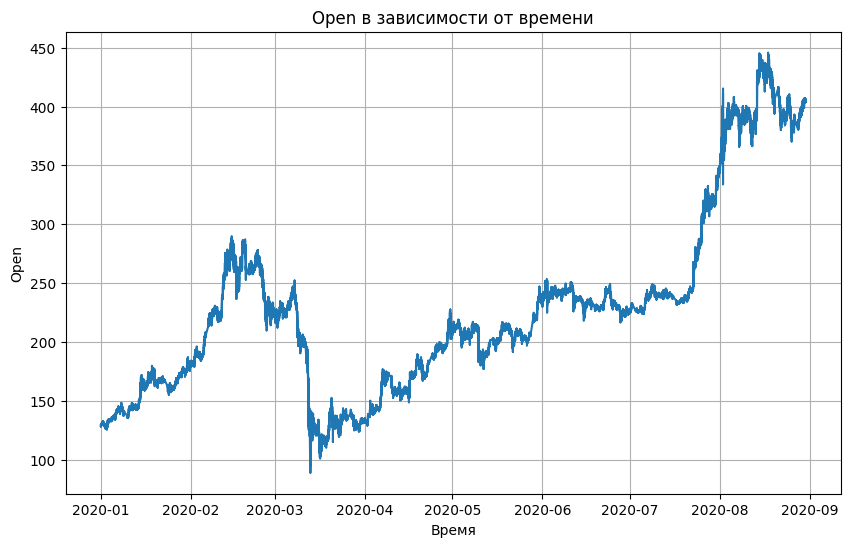

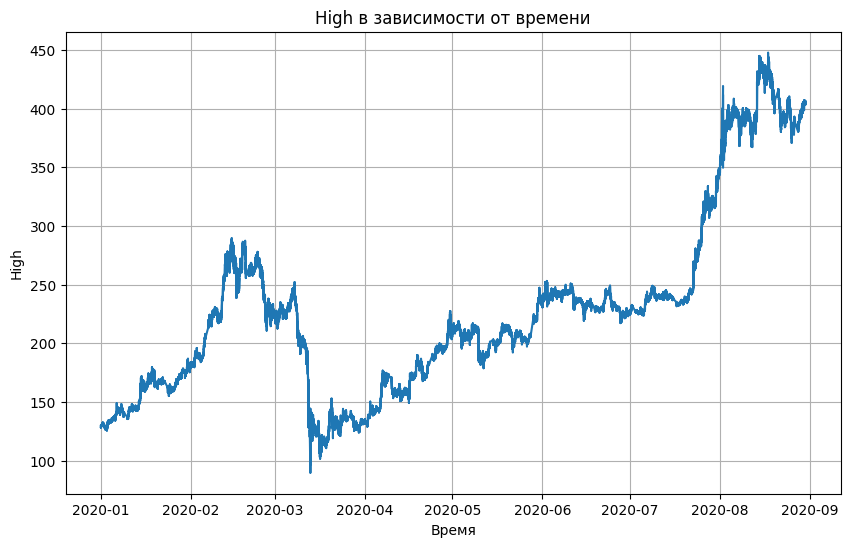

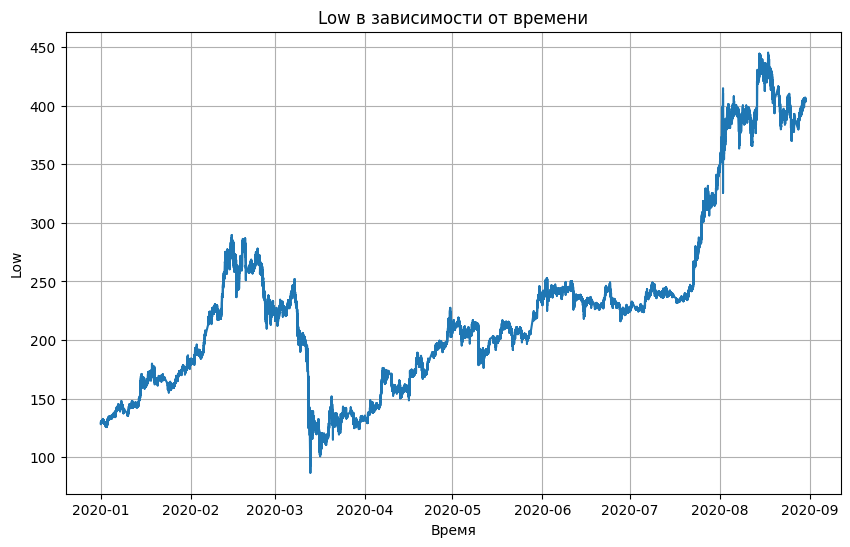

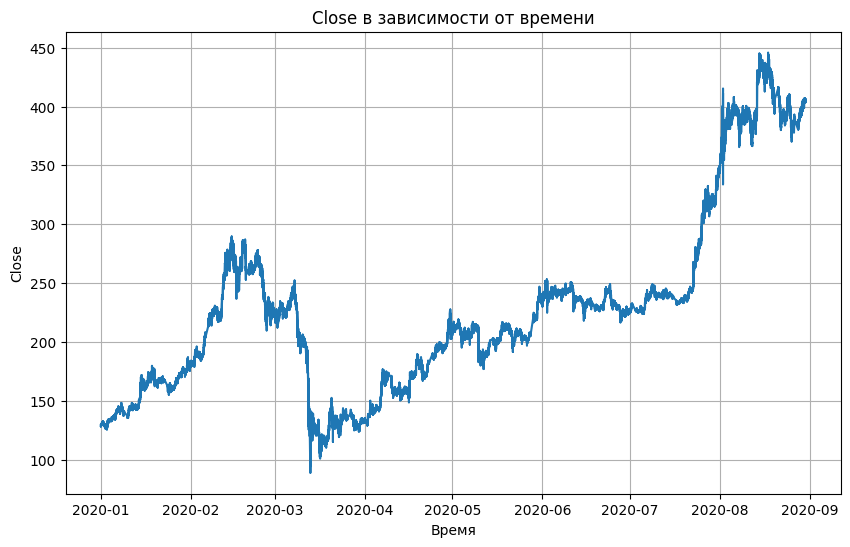

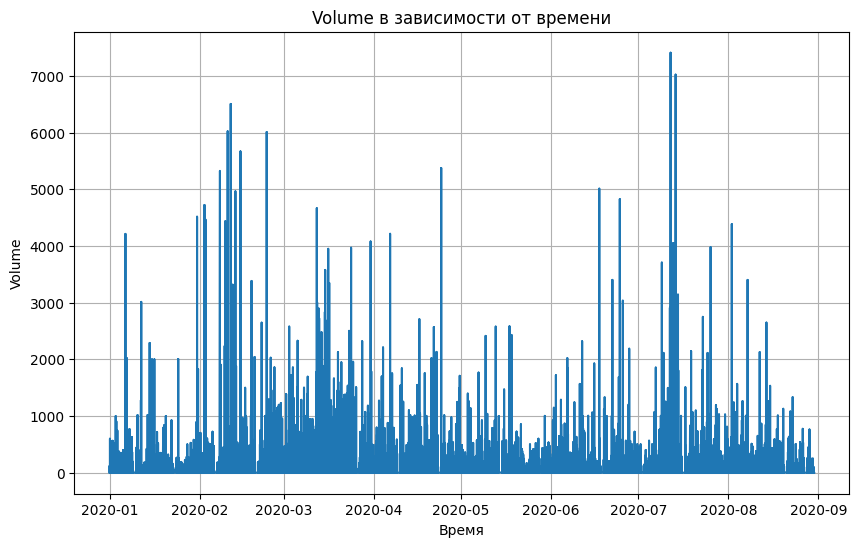

In [29]:
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Volume']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(data['Unix Timestamp'], data[column])
    plt.title(f'{column} в зависимости от времени')
    plt.xlabel('Время')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()